#Machine Learning Mini-Project ECSP303
Performed by

AARUSHI AGRAWAL (A2-22)


SUYASH GOUR     (A4-66)

In [ ]:
#importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
!pip install plotly_express
import plotly_express as px

In [ ]:
# Loading the CSV file
from google.colab import files
uploaded = files.upload()
placement=pd.read_csv("Placement_Data_Full_Class.csv")

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class (1).csv


In [ ]:
#Examine the data set
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [ ]:
#Looking at the datatypes of each factor
placement_copy.dtypes

,0
sl_no,int64
gender,object
ssc_p,float64
ssc_b,object
hsc_p,float64
hsc_b,object
hsc_s,object
degree_p,float64
degree_t,object
workex,object


<Axes: >

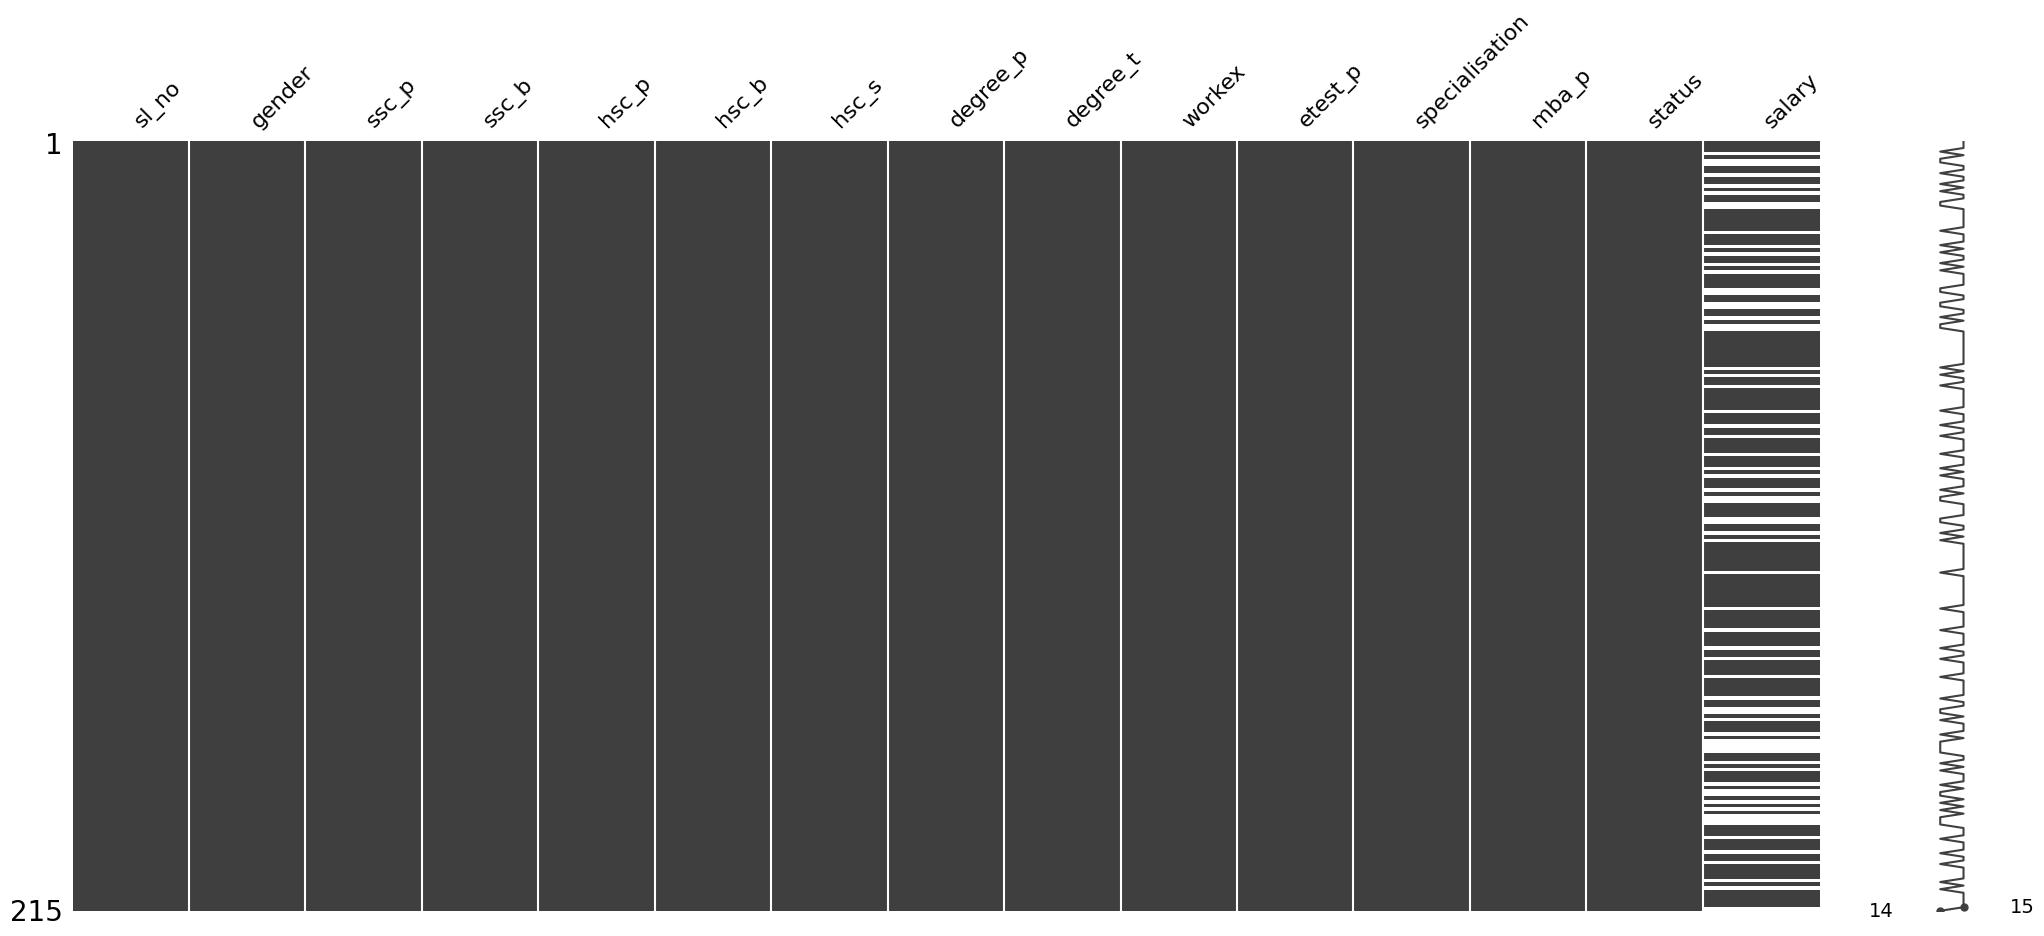

In [ ]:
# Checking for missing data
import missingno as msno
msno.matrix(placement)

In [ ]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


# Data cleaning

In [ ]:
# Handling missing values
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


<ipython-input-8-66d856630c3c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  placement_copy['salary'].fillna(value=0, inplace=True)


In [ ]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability percentage')

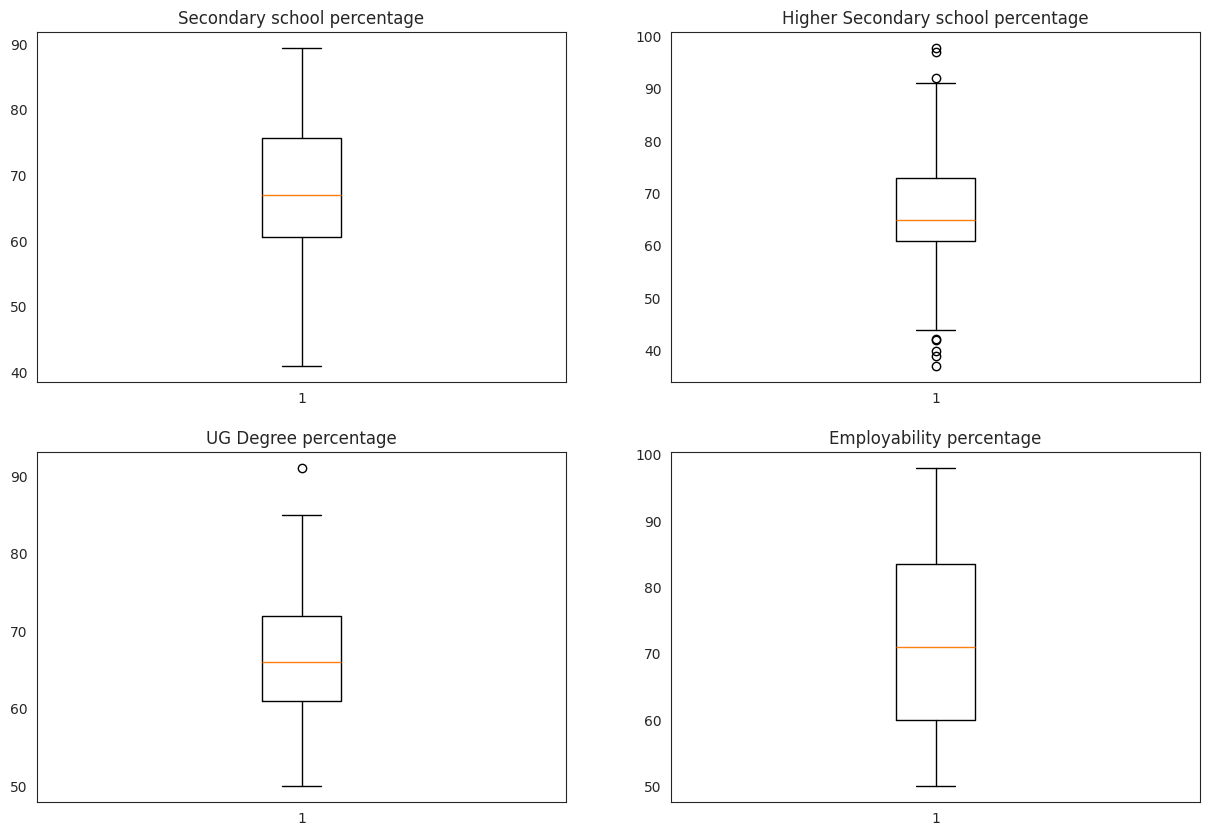

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn

# Checking for outliers
plt.figure(figsize = (15, 10))
# plt.style.use('seaborn-white')
sns.set_style('white') # Set Seaborn style to 'white' to achieve a similar look
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

In [ ]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

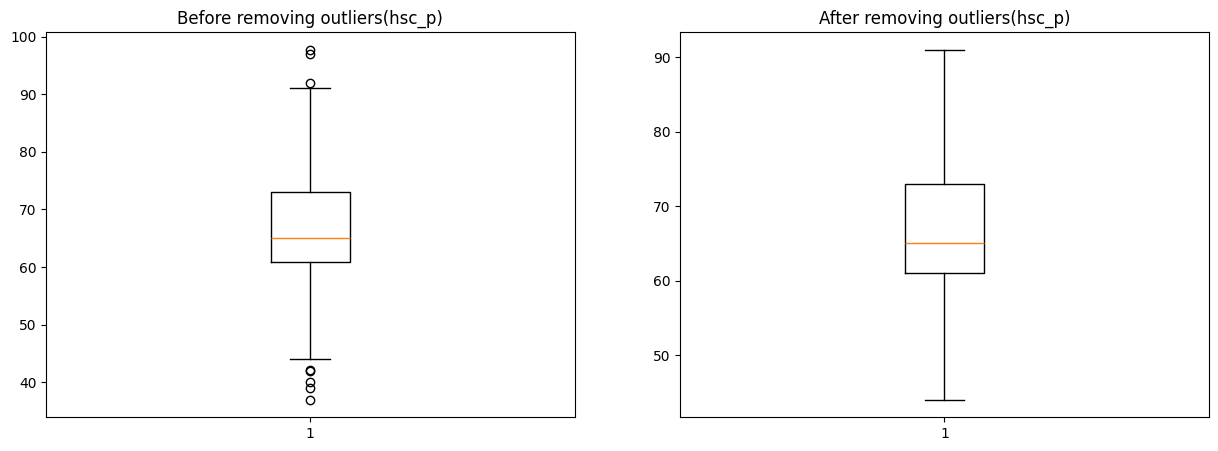

In [ ]:
plt.figure(figsize = (15, 5))
# plt.style.use('seaborn-white')
plt.style.use('default')
# sns.set_style('white') # Use Seaborn's set_style for a similar look
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

# Data visualization

<ipython-input-17-1f064efc21ba>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
<ipython-input-17-1f064efc21ba>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
<ipython-input-17-1f064efc21ba>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)
<ipython-input-17-1f064efc21ba>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
<ipython-input-17-1f064efc21ba>:46: UserWarning: set_ticklabels() should only be used with a fixed number of tic

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

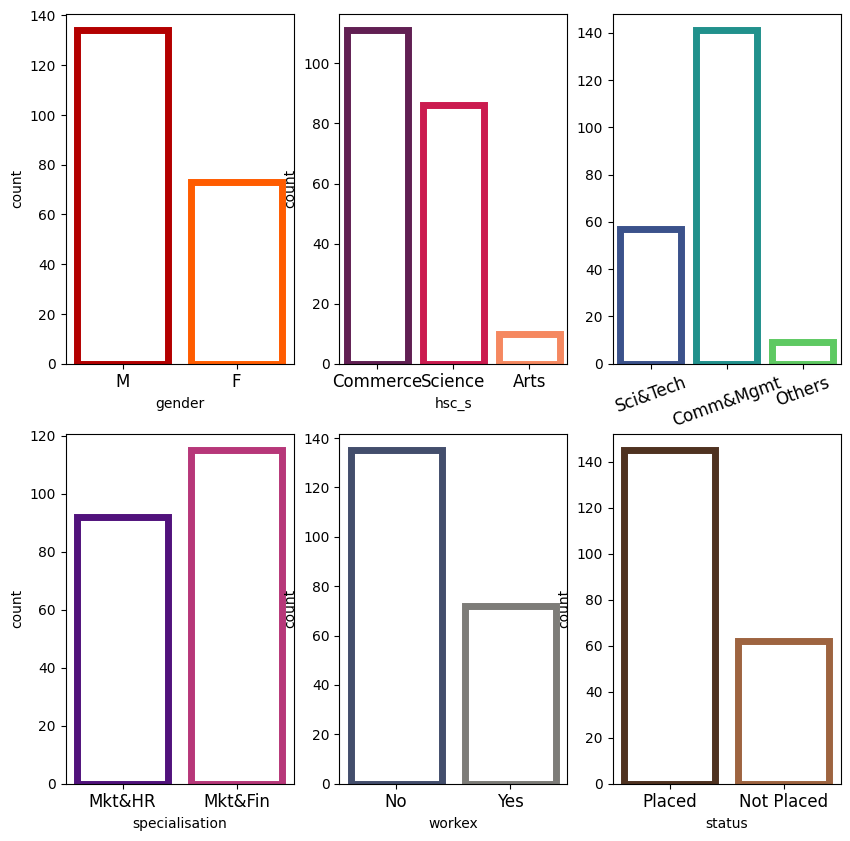

In [ ]:
#Counting the category feature -Count plot
plt.figure(figsize = (15, 7))
# plt.style.use('seaborn-white')
plt.style.use('default')



#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

<ipython-input-18-2eb4a440ff75>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_placed["salary"], ax=ax_hist)


[Text(0.5, 0, '')]

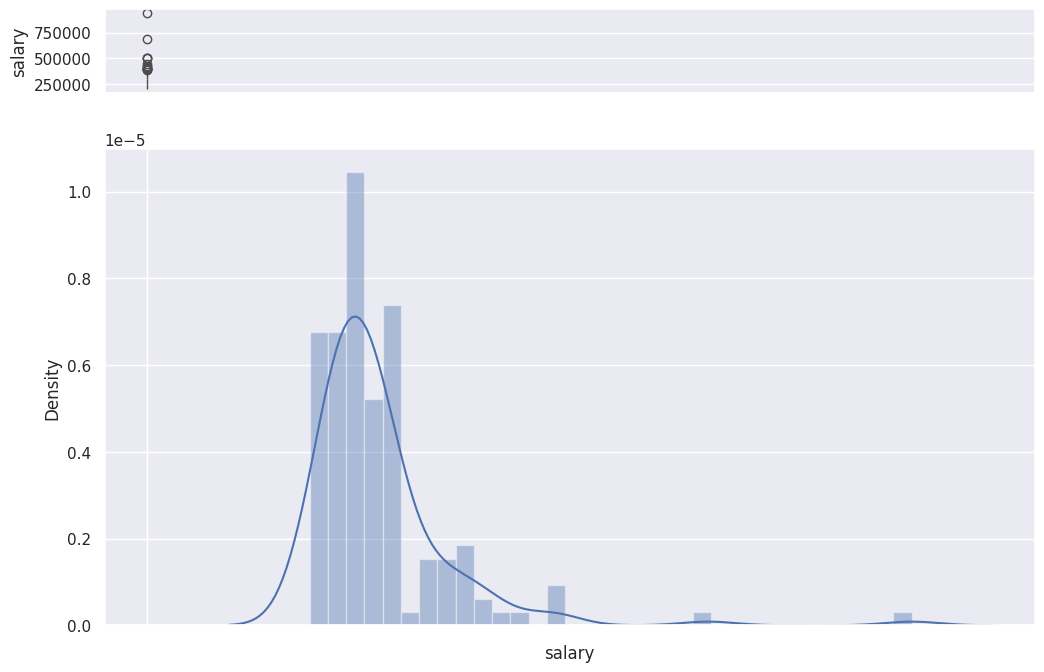

In [ ]:
# Distribution salary -placed student
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [ ]:
# Employability score vs Salary- Joint plot

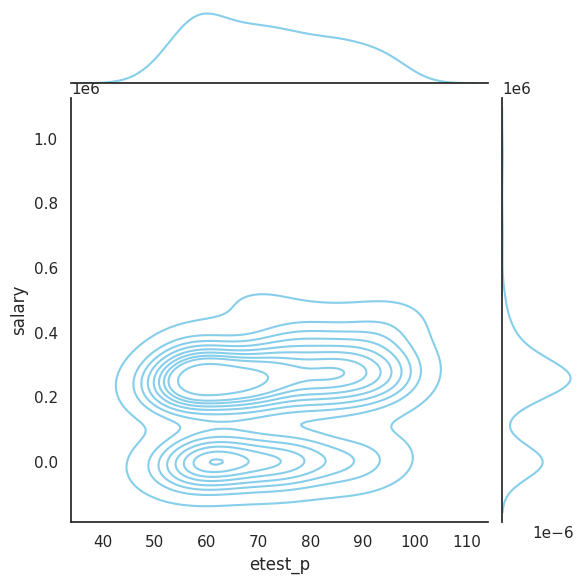

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=placement_filtered["etest_p"], y=placement_filtered["salary"], kind='kde', color="skyblue")

<ipython-input-23-3d843bf03ee2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_filtered['ssc_p'])
<ipython-input-23-3d843bf03ee2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_filtered['hsc_p'])
<ipython-input-23-3d843bf03ee2>:16: UserWarning: 

`distplot` is a deprecat

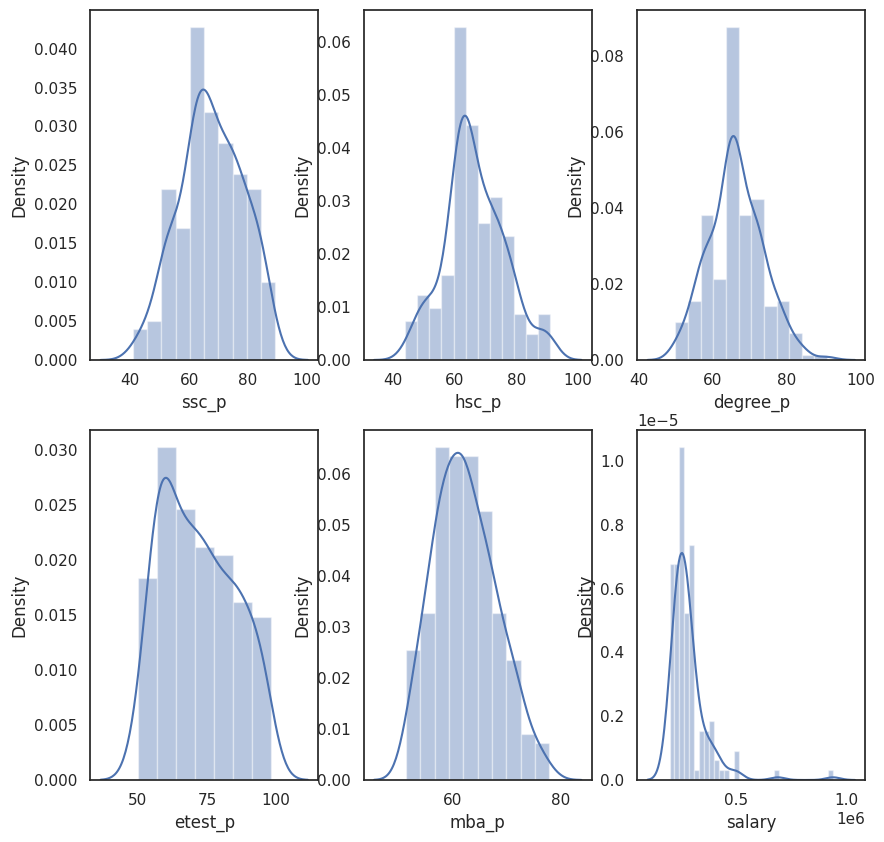

In [ ]:
#Distribution of all percentages
plt.figure(figsize = (15, 7))
# plt.style.use('seaborn-white') # This style is no longer available in newer versions of seaborn
sns.set_style('white') # Use seaborn's set_style function to apply the 'white' style
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

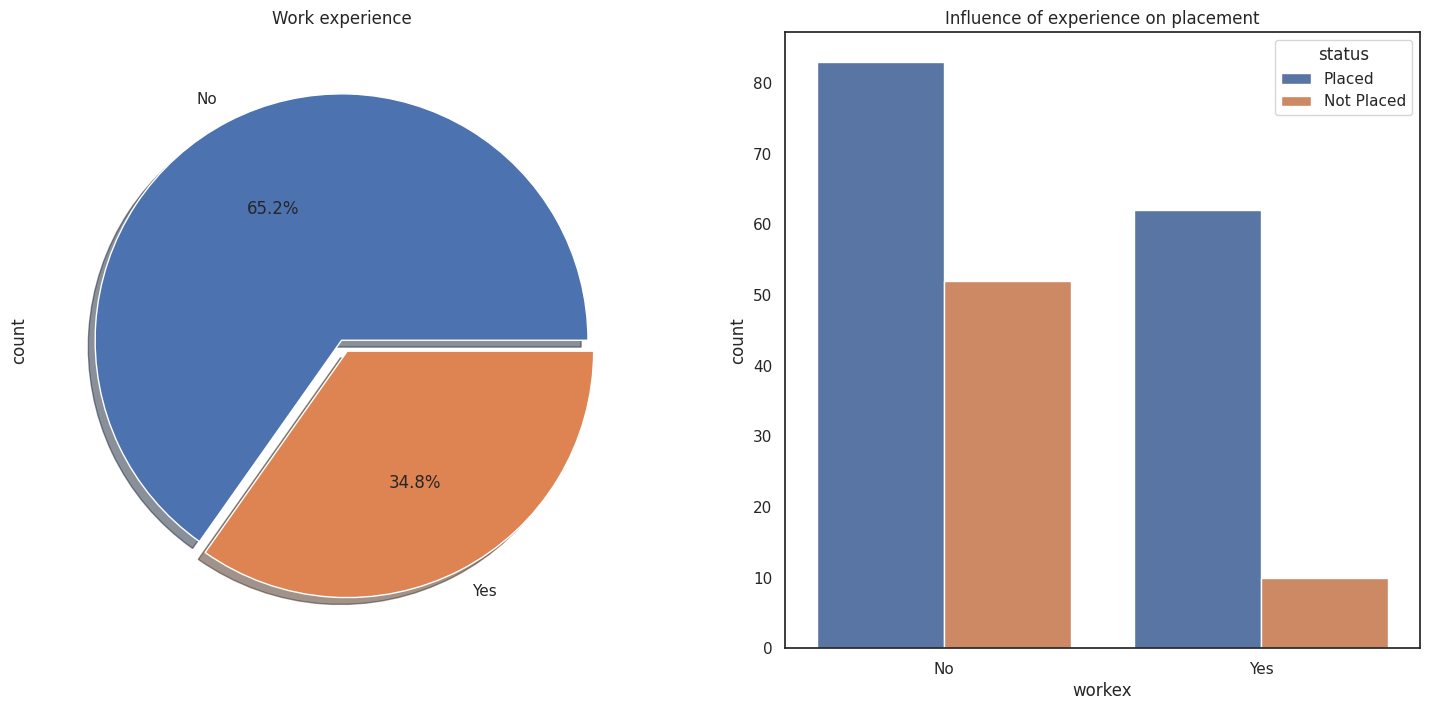

In [ ]:
#Work experience Vs Placement Status
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white') # Use seaborn's set_style function to apply the 'white' style
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

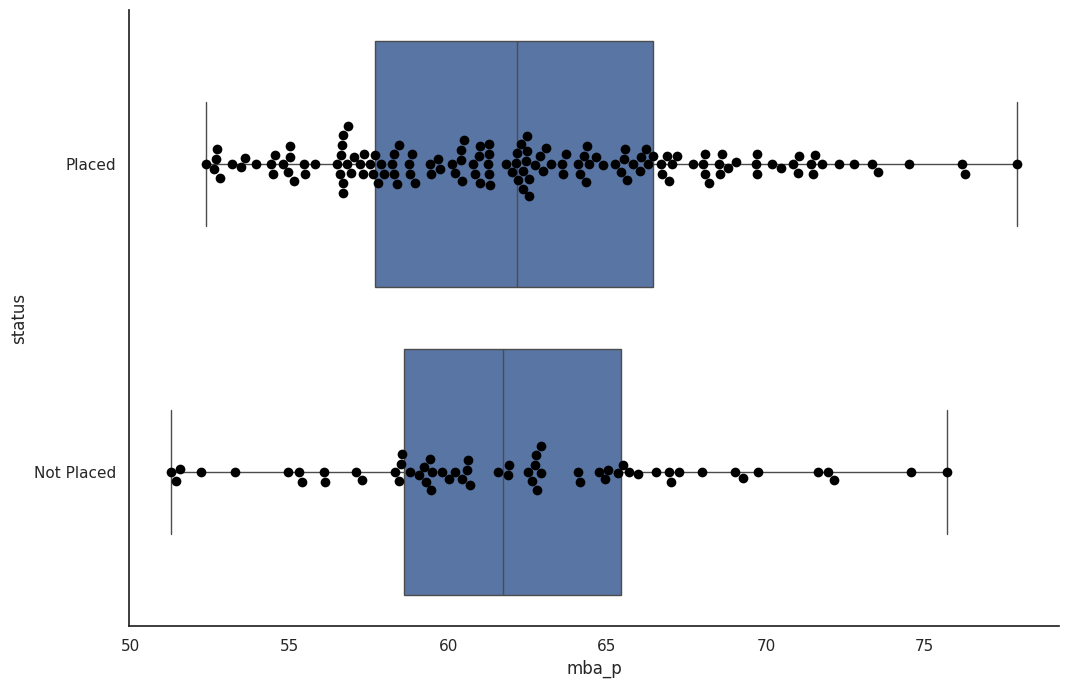

In [ ]:
#MBA marks vs Placement Status- Does your academic score influence?
g = sns.boxplot(y = "status",x = 'mba_p',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [ ]:
import plotly_express as px

In [ ]:
#Does MBA percentage and Employability score correlate?
gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")

In [ ]:
#Is there any gender bias while offering remuneration?
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

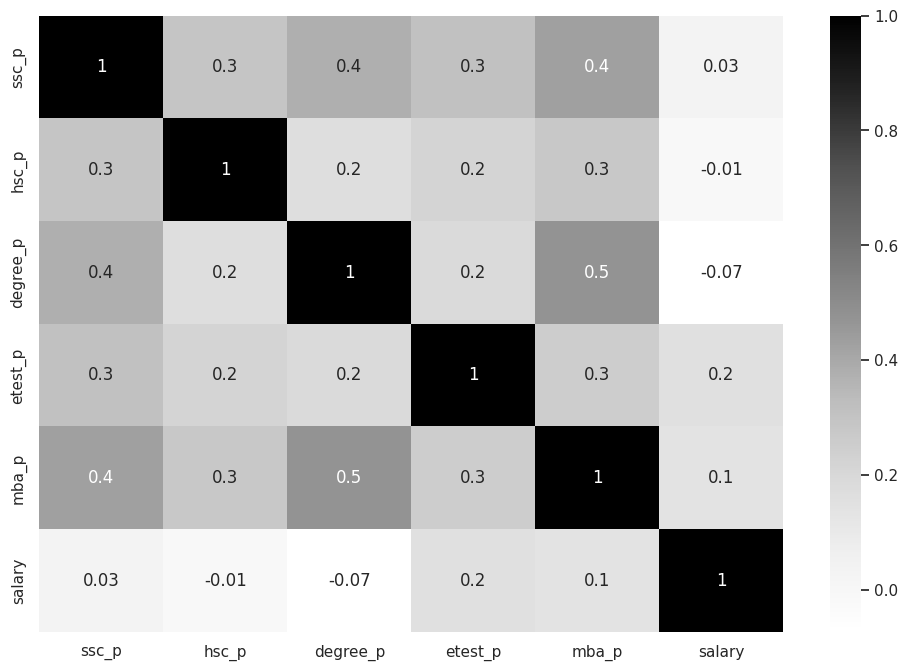

In [ ]:
#Is there any gender bias while offering remuneration?
# Select only numerical features for correlation calculation
numerical_features = placement_placed.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numerical_features.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys')
plt.show() #add this to ensure your plot is shown.

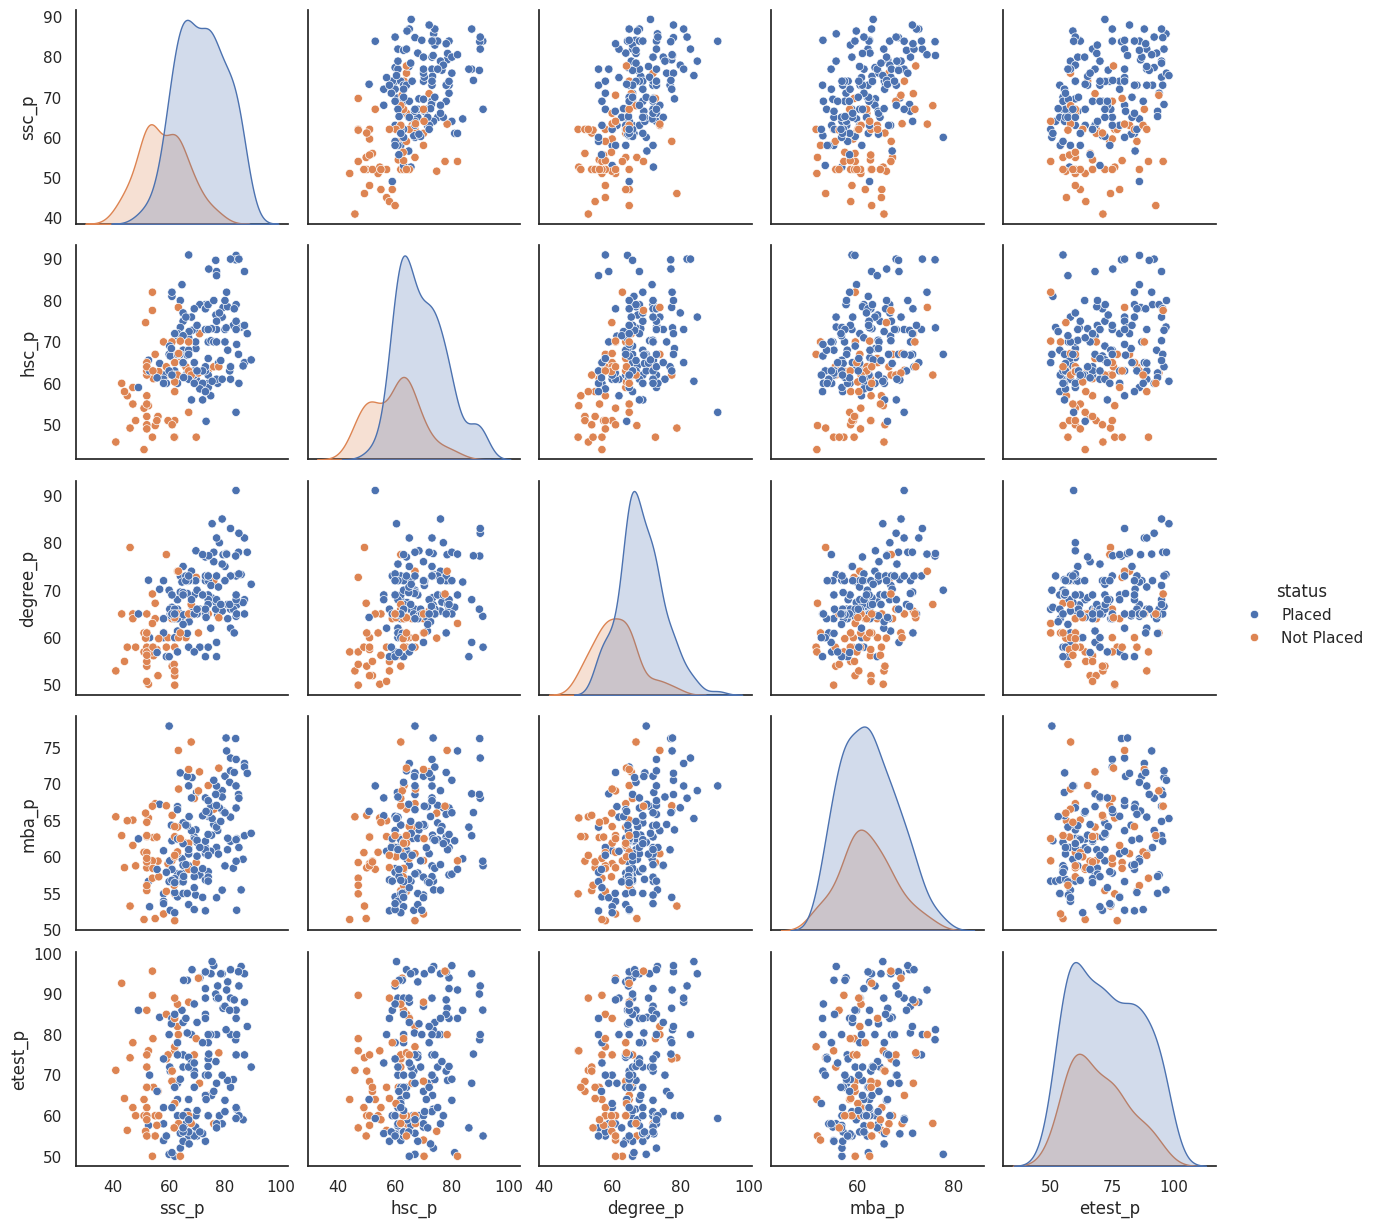

In [ ]:
#Distribution of our data
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

#Preprocessing data for classficiation models

In [ ]:
#Label Encoding
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [ ]:
#One hot encoding
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


In [ ]:
#Assigning the target(y) and predictor variable(X)
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [ ]:
#Train and Test Split (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


# MODELS
#1. LOGISTIC REGRESSION (81%)
#2. DECISION TREE (73%)
#3. K NEAREST NEIGHBOURS (76%)
#4. SUPPORT VECTOR MACHINE (83%)

#LOGISTIC REGRESSION

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # Import cross_val_score from sklearn.model_selection
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Logistic Regression Cross-validation scores:", cv_scores)
print("Logistic Regression Mean Cross-validation score:", cv_scores.mean())
print("Logistic Regression Accuracy test set:",(logreg.score(X_test, y_test)))

Logistic Regression Cross-validation scores: [0.90909091 0.84848485 0.96969697 0.81818182 0.81818182]
Logistic Regression Mean Cross-validation score: 0.8727272727272728
Logistic Regression Accuracy test set: 0.8095238095238095


In [ ]:
#CONFUSION MATRIX AND CLAQSSIFICATION REPORT
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  7]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        27

    accuracy                           0.81        42
   macro avg       0.84      0.75      0.77        42
weighted avg       0.82      0.81      0.80        42



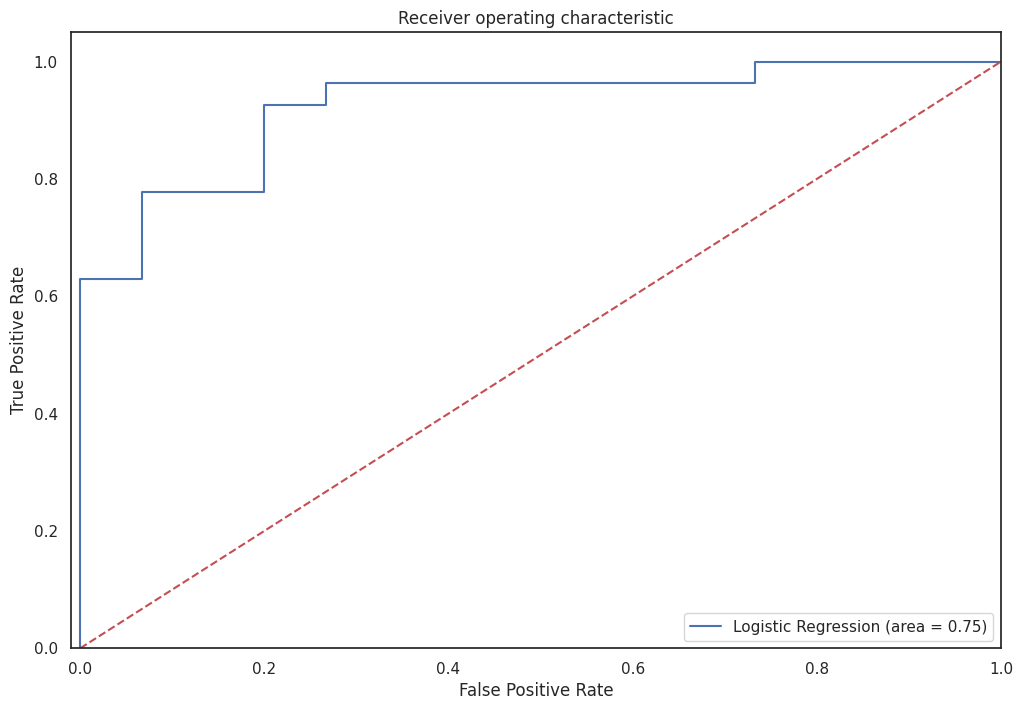

In [ ]:
#ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#DECISION TREE

In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
pip install pydotplus

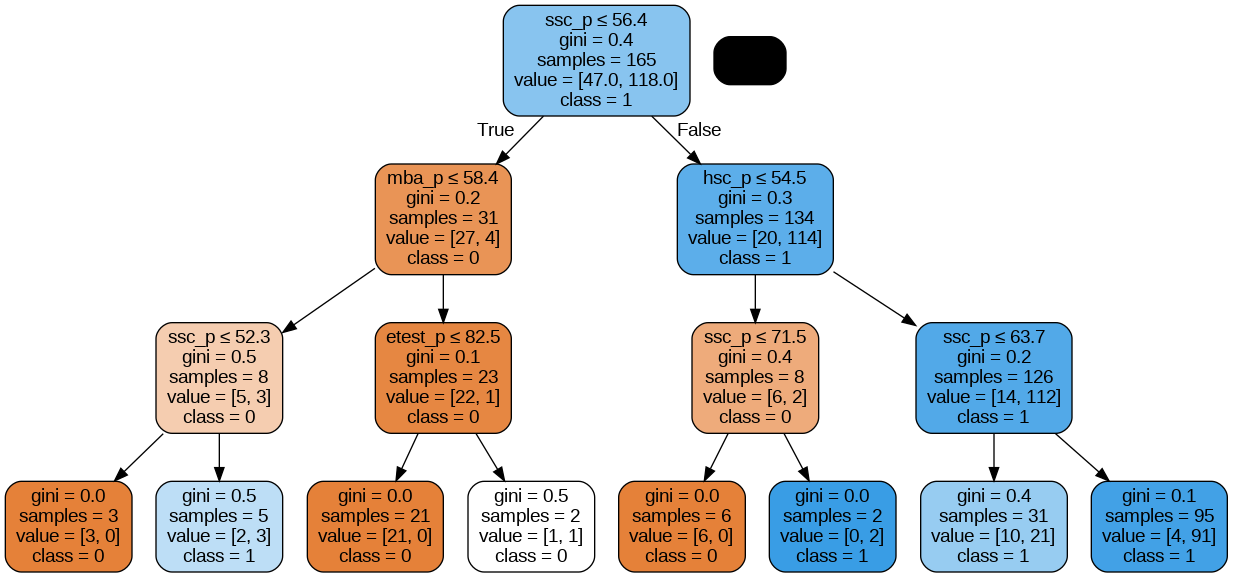

Decision Tree Cross-validation scores: [0.90909091 0.84848485 0.96969697 0.81818182 0.81818182]
Decision Tree Mean Cross-validation score: 0.8727272727272728
Decision Tree Test Accuracy: 0.7380952380952381


In [ ]:
# Instead of importing StringIO from sklearn.externals.six, import it directly from the io module.
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Assuming 'X' is your original DataFrame and 'feature_cols_all' stores the names of all 14 features.
feature_cols_all = X.columns # Replace 'X' with the actual name of your DataFrame

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols_all,
                class_names=['0','1'], precision=1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("decision_tree.png")
display(Image("decision_tree.png"))
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Assuming you have X_train, X_test, y_train, y_test from your previous code

# Create and train the Decision Tree model
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)  # You can adjust parameters
dt = dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Cross-validation scores:", cv_scores)
print("Decision Tree Mean Cross-validation score:", cv_scores.mean())
print("Decision Tree Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


#K NEAREST NEIGHBOURS

In [ ]:
#CHOOSING A K VALUE
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

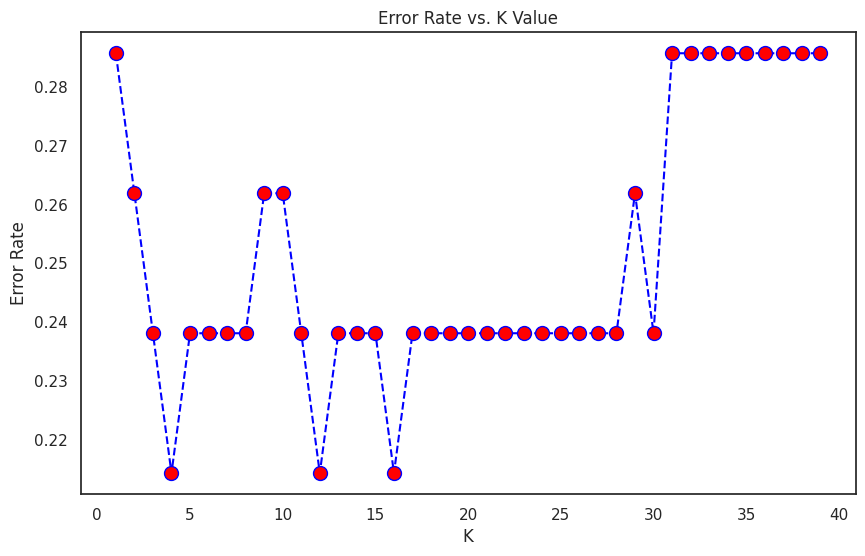

In [ ]:
#ERROR VS K-VALUE
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("K Nearest Neighbors Cross-validation scores:", cv_scores)
print("K Nearest Neighbors Mean Cross-validation score:", cv_scores.mean())
print("K Nearest Neighbors Test Accuracy:", accuracy)

Confusion Matrix:
 [[ 6  9]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.74      0.96      0.84        27

    accuracy                           0.76        42
   macro avg       0.80      0.68      0.69        42
weighted avg       0.78      0.76      0.73        42

K Nearest Neighbors Cross-validation scores: [0.90909091 0.84848485 0.96969697 0.81818182 0.81818182]
K Nearest Neighbors Mean Cross-validation score: 0.8727272727272728
K Nearest Neighbors Test Accuracy: 0.7619047619047619


#SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(svclassifier, X_train, y_train, cv=5)  # 5-fold cross-validation
# Print cross-validation scores and mean score
print("SVM Cross-validation scores:", cv_scores)
print("SVM Mean Cross-validation score:", cv_scores.mean())
print("SVM Test Accuracy:", accuracy)

Confusion Matrix:
 [[10  5]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.83      0.93      0.88        27

    accuracy                           0.83        42
   macro avg       0.83      0.80      0.81        42
weighted avg       0.83      0.83      0.83        42

SVM Cross-validation scores: [0.96969697 0.84848485 0.90909091 0.81818182 0.87878788]
SVM Mean Cross-validation score: 0.884848484848485
SVM Test Accuracy: 0.8333333333333334


# All Models Visualization


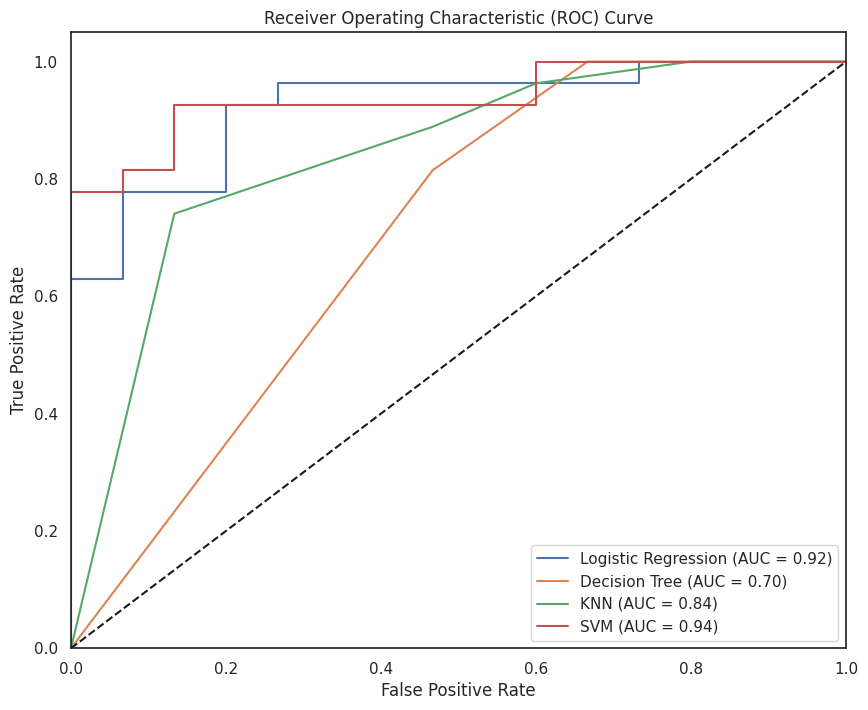

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train models
logreg = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion="gini", max_depth=3).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train, y_train)
svc = SVC(kernel='linear', probability=True).fit(X_train, y_train)  # Note: probability=True for SVC

# Calculate ROC AUC scores and curves
models = [logreg, dt, knn, svc]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM']
plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    if name == 'KNN':  # KNN needs predict_proba to be enabled
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.predict_proba(X_test)[:, 1]  # Get probability scores for positive class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion:
1. LOGISTIC REGRESSION (81%)
2. DECISION TREE (73%)
3. K NEAREST NEIGHBOURS (76%)
4. SUPPORT VECTOR MACHINE (83%)



 In this project we use Support Vector Machine Model as it's accuracy is highest i.e. 83%